(number-factors-notebook)=
# Il numero dei fattori 

L’analisi fattoriale esplorativa (EFA) è uno dei modelli statistici più utilizzati in psicologia. È fondamentale per la validazione delle scale di misurazione, l’identificazione di dimensioni latenti  e la sintesi dei dati. Il problema chiave in un’EFA è la selezione del numero di fattori, che non è banale perché l’aggiunta di ulteriori fattori migliorerà sempre l’adattamento ai dati, anche se il vero numero di fattori è piccolo.

La maggior parte dei metodi esistenti per selezionare il numero di fattori si divide in due categorie. 

- I metodi della prima categoria analizzano gli autovalori della matrice di covarianza per determinare il numero di fattori. 
- La seconda categoria affronta la stima del numero di fattori come un problema di selezione di modelli. Poiché il modello fattoriale con il maggior numero di fattori si adatta sempre meglio ai dati, la stima del numero di fattori nella popolazione richiede un compromesso tra adattamento del modello e complessità.

Oltre a queste due categorie principali, esistono altri metodi come il metodo Very Simple Structure (VSS) (Revelle e Rocklin, 1979) che cerca di recuperare strutture semplici facilmente interpretabili, o l’analisi grafica esplorativa (EGA) recentemente proposta (Golino e Demetriou, 2017; Golino e Epskamp, 2017), che stima prima una matrice di correlazione parziale regolarizzata e successivamente applica un algoritmo di rilevamento della comunità per determinare il numero di fattori.

In [1]:
# library(devtools)
# install_github("jmbh/fspe")

source("_common.R")
suppressPackageStartupMessages({
    library("psych")
    library("paran")
    library("fspe")
})

set.seed(42)

## Metodi basati sugli autovalori

Sono stati proposti quattro criteri basati sugli autovalori per determinare il numero $m$ di
fattori da estrarre (Rencher, 2002).

-   Scegliere $m$ tale per cui la varianza spiegata dal modello
    fattoriale superi una soglia predeterminata, per esempio l'80% della
    varianza totale, $tr(\textbf{S})$ o $tr(\textbf{R})$.
-   Scegliere $m$ uguale al numero di autovalori aventi un valore
    maggiore del valore medio degli autovalori. Per **R** il valore
    medio degli autovalori è $1$; per **S** è $\sum_{j=1}^p \theta_j/p$.
-   Usare lo *scree test*.
-   Mediante la statistica $\chi^2$, valutare l'ipotesi che $m$ sia il numero corretto di fattori,
    $H_0: \boldsymbol{\Sigma} =  \boldsymbol{\Lambda}
      \boldsymbol{\Lambda}^{\mathsf{T}} +  \boldsymbol{\Psi}$,
    dove $\boldsymbol{\Lambda}$ è di ordine $p \times m$.

### Quota di varianza spiegata

Il primo criterio si applica soprattutto al metodo delle componenti
principali. La proporzione della varianza capionaria spiegata dal
fattore $j$-esimo estratto da **S** è uguale a

$$\sum_{i=i}^p \hat{\lambda}_{ij}^2 / tr(\textbf{S}).$$ 

Nel caso in cui
i fattori vengano estratti da **R** avremo

$$\sum_{i=i}^p \hat{\lambda}_{ij}^2 / p.$$

Nel caso di fattori incorrelati, ciascun fattore contribuisce con una
quota complessiva di varianza spiegata pari alla somma dei quadrati
delle saturazioni fattoriali contenute nella matrice
$\hat{\boldsymbol{\Lambda}}$:
$\sum_{i=1}^p\sum_{j=1}^m\hat{\lambda}_{ij}^2$. Nel caso del metodo
delle componenti principali, tale somma è anche uguale alla somma dei
primi $m$ autovalori, o alla somma di tutte le $p$ comunalità:

$$\sum_{i=1}^p\sum_{j=1}^m\hat{\lambda}_{ij}^2= \sum_{i=1}^p \hat{h}_i^2
= \sum_{j=1}^m \theta_j$$

Sulla base di queste considerazioni, il numero $m$ di fattori viene
scelto in modo da spiegare una quota sufficientemente grande di **S** o
$p$.

Il numero dei fattori può essere determinato in questo modo anche nel
caso in cui l'analisi fattoriale venga eseguita con il metodo dei
fattori principali (ovvero, nel caso in cui vengano usate le stime delle
comunalità per generare la matrice ridotta $\textbf{S} -
\hat{\boldsymbol{\Psi}}$ o $\textbf{R} - \hat{\boldsymbol{\Psi}}$). In
questo caso, però, è possibile che alcuni autovalori della matrice
$\textbf{S} - \hat{\boldsymbol{\Psi}}$ o $\textbf{R} -
\hat{\boldsymbol{\Psi}}$ assumano valore negativo. In tali circostanze,
è possibile che la proporzione cumulativa della varianza
$\sum_{j=1}^m \theta_j / \sum_{j=1}^p \theta_j$ assuma un valore
maggiore di $1.0$ per $j < p$.

La proporzione cumulativa della varianza si riduce poi a $1.0$ quando
vengono considerati anche i successivi autovalori negativi. Di
conseguenza, può succedere che, utilizzando la matrice
$\textbf{S} - \hat{\boldsymbol{\Psi}}$ o
$\textbf{R} - \hat{\boldsymbol{\Psi}}$, il criterio definito in base
alla quota della varianza spiegata venga raggiunto per un valore $m$
minore di quello che verrebbe trovato utilizzando la matrice **S** o
**R**.

Nel caso del metodo dei fattori principali iterato, $m$ viene
specificato precedentemente a ciascuna iterazione e $\sum_{i}
\hat{h}^2_i$ viene ottenuto dopo ciascuna iterazione calcolando
$\text{tr}(\textbf{S} - \hat{\boldsymbol{\Psi}})$. Per scegliere $m$,
come per il metodo delle componenti principali, possono essere usati gli
autovalori di **S** o **R**.

### Valore medio degli autovalori

Il calcolo del valore medio degli autovalori è una procedura euristica
implementata in molti software. In una variante di tale metodo, $m$
viene scelto in modo tale da uguagliare il numero degli autovalori
positivi della matrice ridotta $\textbf{R} - \hat{\boldsymbol{\Psi}}$ (in tale matrice vi sono solitamente degli autovalori negativi). Tale variante ha però lo svantaggio di produrre
solitamente un numero di fattori troppo grande.

### Scree test

Lo scree test si basa su un grafico che rappresenta gli autovalori di **S** o **R** ordinati in modo decrescente in funzione del numero dei fattori. I punti che rappresentano gli autovalori vengono collegati con una spezzata. Il valore m viene determinato in corrispondenza del fattore oltre il quale il dislivello tra fattori successivi diventa esiguo e la spezzata tende a diventare orizzontale.

### Parallel analysis

La Parallel Analysis è un metodo alternativo allo scree test[^1]. Nella
Parallel Analysis, il criterio usato per decidere il numero di fattori
da estrarre viene determinato dal confronto con la media degli
autovalori generati da un campione casuale di variabili standardizzate.
Tale confronto ha lo scopo di controllare le variazioni dovute agli
errori di campionamento. Anche se, nel caso di variabili incorrelate,
tutti gli autovalori di una matrice di correlazione dovrebbero avere un
valore pari a uno, come conseguenza della variabilità campionaria in
qualunque campione finito vi sono comunque uno o più autovalori empirici
maggiori di uno.

La procedura può essere illustrata mediante la seguente
simulazione di Monte Carlo. Si consideri una matrice di correlazione
calcolata su $p=10$ variabili casuali mutuamente indipendenti, ciascuna
costituita da $n=20$ osservazioni.

In [2]:
n <- 20
nsim <- 1000
e1 <- rep(0, nsim)
for (i in 1:nsim) {
  Y <- cbind(
    rnorm(n), rnorm(n), rnorm(n), rnorm(n), rnorm(n),
    rnorm(n), rnorm(n), rnorm(n), rnorm(n), rnorm(n)
  )
  e <- eigen(cor(Y))
  e1[i] <- e$values[1]
}
max(e1)

[1] 3.345284

Per i dati di questa simulazione, l'autovalore maggiore ha un valore
pari a $3.53$, anche se i dati sono del tutto casuali. La Parallel
Analysis tiene conto di questo fatto e determina $m$ confrontando gli
autovalori empirici con le loro "controparti casuali." Vanno a
determinare $m$ solo gli autovalori empirici che hanno un valore
superiore ai corrispondenti autovalori generati da una matrice di dati
dello stesso ordine composta da colonne mutualmente incorrelate. Nel
caso dell'esempio presente, per esempio, l'autovalore maggiore dovrà
avere un valore maggiore di $3.53$.

## Metodi basati sul confronto tra modelli

Il confronto tra modelli può essere eseguito usando varie statistiche. Una scelta popolare per stimare il numero di fattori nella EFA è il Criterio d’Informazione Bayesiano (BIC; Schwarz, 1978), introdotto come un miglioramento rispetto al Criterio d’Informazione di Akaike (AIC; Akaike, 1973). Un’alternativa è l’indice RMSEA, che può essere considerato come una stima della mancanza di adattamento che tiene in considerazione i gradi di libertà del modello (Browne e Cudeck, 1992). Un altro metodo di questo tipo è il test Minimum Average Partial (MAP), che stima le correlazioni parziali residue medie per diversi numeri di fattori e seleziona quello con il valore più basso (Velicer, 1976). 

### Test del rapporto di verosimiglianze

Consideriamo il confronto tra modelli più semplice, ovvero quello basato sulla statistica $\chi^2$.
Se si assume la normalità distributiva dei dati è possibile valutare la
bontà di adattamento attraverso il test del rapporto di verosimiglianze.
L'ipotesi nulla postula che la matrice di covarianza delle $Y$ abbia la
forma specificata dal modello fattoriale, ossia

$$
H_0: \boldsymbol{\Sigma} =  \boldsymbol{\Lambda}
  \boldsymbol{\Lambda}^{\mathsf{T}} +  \boldsymbol{\Psi},
$$
  
ovvero che $m$ fattori comuni siano sufficienti per spiegare la
struttura di interdipendenza della variabile casuale $Y$ oggetto di
osservazione campionaria. L'alternativa è che $m$ fattori comuni non
siano sufficienti per riprodurre $\boldsymbol{\Sigma}$

$$
H_1: \boldsymbol{\Sigma} \neq  \boldsymbol{\Lambda}
  \boldsymbol{\Lambda}^{\mathsf{T}} +  \boldsymbol{\Psi},
$$
  
dove $\boldsymbol{\Lambda}$ è di ordine $p \times m$. Se l'ipotesi nulla
non viene rifiutata vuol dire che il modello fornisce un buon
adattamento ai dati.

Sotto l'ipotesi nulla, il test ha una distribuzione asintotica, per
$n \rightarrow \infty$, di tipo chi quadrato con gradi di libertà pari
a: 

$$\nu=\frac{1}{2}\left[ (p-m)^2 - (p - m) \right].$$ 

Il rifiuto di $H_0$ implica che $m$ è troppo piccolo e un numero maggiore di fattori è
necessario. 

Solitamente si inizia l'analisi considerando un numero di
fattori molto piccolo: $m^*=1$ e si prende come ipotesi per il test che
il numero di fattori sia $m^*$. Se l'ipotesi nulla è accettata il
procedimento si arresta, altrimenti si passa a considerare $m^* + 1$
fattori e si prosegue con lo stesso ragionamento. Il procedimento si
arresta non appena si verifica una delle seguenti situazioni: è stata
accettata l'ipotesi $H_0$ per un certo valore di $m$, oppure,
$\nu=\frac{1}{2}\left[ (p-m)^2 - (p - m) \right]=0$, ossia la variabile
$\chi^2$ dovrebbe avere zero gradi di libertà, che non è possibile. Per poter applicare il test che determina il buon grado di adattamento del modello fattoriale occorre che i gradi di libertà della statistica del chi-quadrato siano positivi. 

In pratica, quando $n$ è grande, il test basato sul rapporto di verosimiglianze rivela un numero di fattori maggiore degli altri metodi descritti in precedenza. Alcuni considerano
dunque il valore $m$ indicato dal test quale limite superiore del numero
dei fattori che rivestono una qualche importanza pratica.

Un limite della procedura basata su $\chi^2$ è che questa statistica è fortemente dipendente dalle dimensioni del campione.

Se si usa lavaan, è possibile ricavare le statistiche AIC, BIC e RMSEA. Come per il $\chi^2$ è possibile calcolare il valore di queste statistiche in funzione del numero dei fattori. Gli indici AIC, BIC e RMSEA non consentono un test statistico per il confronto tra modelli. Se si effettua una scelta in base a tali criteri, si sceglie la soluzione a cui è associato il valore più piccolo di AIC, BIC o RMSEA. 

### Minimizzazione dell'out-of-sample prediction error

Recentemente è stato proposto un nuovo metodo per stimare il numero di fattori in EFA che affronta il problema come un problema di selezione del modello {cite:p}`haslbeck2022estimating`. L’obiettivo è confrontare i modelli con 1, 2, …, p fattori, dove $p$ è il numero di variabili, e selezionare il modello con l’errore di previsione atteso più basso nella popolazione. Tuttavia, questo è un compito non banale perché il modello che minimizza l’errore di previsione nel campione non minimizza sempre l’errore di previsione nella popolazione. 

Intuitivamente, questo problema viene affrontato suddividendo il campione di dati in due insiemi: un set di training e un set di test. Il set di training viene utilizzato per stimare i parametri del modello, le cui previsioni vengono poi verificate utilizzando i dati di test (non utilizzati per la stima dei parametri). Questo calcolo dell’errore di previsione fuori campione viene ripetuto diverse volte, suddividendo ogni volta in modo casuale il campione negli insiemi di training e test. Tale metodo per stimare il numero di fattori è implementato nel pacchetto R `fspe`.

**Esempio.** Per confrontare i quattro metodi discussi per la scelta del numero $m$
di fattori usiamo qui una matrice di correlazioni calcolata sulle sottoscale della WAIS. Le 11 sottoscale del test sono le seguenti:

- X1 = Information
- X2 = Comprehension
- X3 = Arithmetic
- X4 = Similarities
- X5 = Digit.span
- X6 = Vocabulary
- X7 = Digit.symbol
- X8 = Picture.completion
- X9 = Block.design
- X10 = Picture.arrangement
- X11 = Object.

I dati sono stati ottenuti dal manuale della III edizione.

In [3]:
varnames <- c("IN", "CO", "AR", "SI", "DS", "VO", "SY", "PC", 
              "BD", "PA", "OA", "AG", "ED")
temp <- matrix(c(
	1,0.67,0.62,0.66,0.47,0.81,0.47,0.60,0.49,0.51,0.41,
	-0.07,0.66,.67,1,0.54,0.60,0.39,0.72,0.40,0.54,0.45,
	0.49,0.38,-0.08,0.52,.62,.54,1,0.51,0.51,0.58,0.41,
	0.46,0.48,0.43,0.37,-0.08,0.49,.66,.60,.51,1,0.41,
	0.68,0.49,0.56,0.50,0.50,0.41,-0.19,0.55,.47,.39,.51,
	.41,1,0.45,0.45,0.42,0.39,0.42,0.31,-0.19,0.43,
	.81,.72,.58,.68,.45,1,0.49,0.57,0.46,0.52,0.40,-0.02,
	0.62,.47,.40,.41,.49,.45,.49,1,0.50,0.50,0.52,0.46,
	-0.46,0.57,.60,.54,.46,.56,.42,.57,.50,1,0.61,0.59,
	0.51,-0.28,0.48,.49,.45,.48,.50,.39,.46,.50,.61,1,
	0.54,0.59,-0.32,0.44,.51,.49,.43,.50,.42,.52,.52,.59,
	.54,1,0.46,-0.37,0.49,.41,.38,.37,.41,.31,.40,.46,.51,
	.59,.46,1,-0.28,0.40,-.07,-.08,-.08,-.19,-.19,-.02,
	-.46,-.28,-.32,-.37,-.28,1,-0.29,.66,.52,.49,.55,.43,
	.62,.57,.48,.44,.49,.40,-.29,1
), nrow=13, ncol=13, byrow=TRUE)

colnames(temp) <- varnames
rownames(temp) <- varnames

wais_cor <- temp[1:11, 1:11]
wais_cor

,IN,CO,AR,SI,DS,VO,SY,PC,BD,PA,OA
IN,1.00,0.67,0.62,0.66,0.47,0.81,0.47,0.60,0.49,0.51,0.41
CO,0.67,1.00,0.54,0.60,0.39,0.72,0.40,0.54,0.45,0.49,0.38
AR,0.62,0.54,1.00,0.51,0.51,0.58,0.41,0.46,0.48,0.43,0.37
SI,0.66,0.60,0.51,1.00,0.41,0.68,0.49,0.56,0.50,0.50,0.41
DS,0.47,0.39,0.51,0.41,1.00,0.45,0.45,0.42,0.39,0.42,0.31
VO,0.81,0.72,0.58,0.68,0.45,1.00,0.49,0.57,0.46,0.52,0.40
SY,0.47,0.40,0.41,0.49,0.45,0.49,1.00,0.50,0.50,0.52,0.46
PC,0.60,0.54,0.46,0.56,0.42,0.57,0.50,1.00,0.61,0.59,0.51
BD,0.49,0.45,0.48,0.50,0.39,0.46,0.50,0.61,1.00,0.54,0.59
PA,0.51,0.49,0.43,0.50,0.42,0.52,0.52,0.59,0.54,1.00,0.46


Il primo metodo per la determinazione di $m$ richiede di estrarre tanti
fattori quanti sono necessari per spiegare una quota predeterminata
della varianza totale. Supponiamo di porre il criterio pari all'80%
della varianza totale. La soluzione ottenuta in questo modo ci
porterebbe a mantenere $m=5$ fattori:

In [4]:
out <- eigen(wais_cor)
sum(out$val[1:4]) / sum(out$val)
sum(out$val[1:5]) / sum(out$val)

[1] 0.7656781

[1] 0.8118853

Il secondo metodo suggerisce di mantenere tutti gli autovalori superiori
al valore medio degli autovalori (che, nel caso di **R** è uguale a
$1$). Nel caso presente, $m=2$:

In [5]:
print(round(out$values, 3))

 [1] 6.074 1.015 0.746 0.587 0.508 0.431 0.423 0.377 0.351 0.310 0.177


Il terzo metodo, lo scree test, può essere eseguito usando la funzione
`VSS.scree()` contenuta nel pacchetto `psych`.

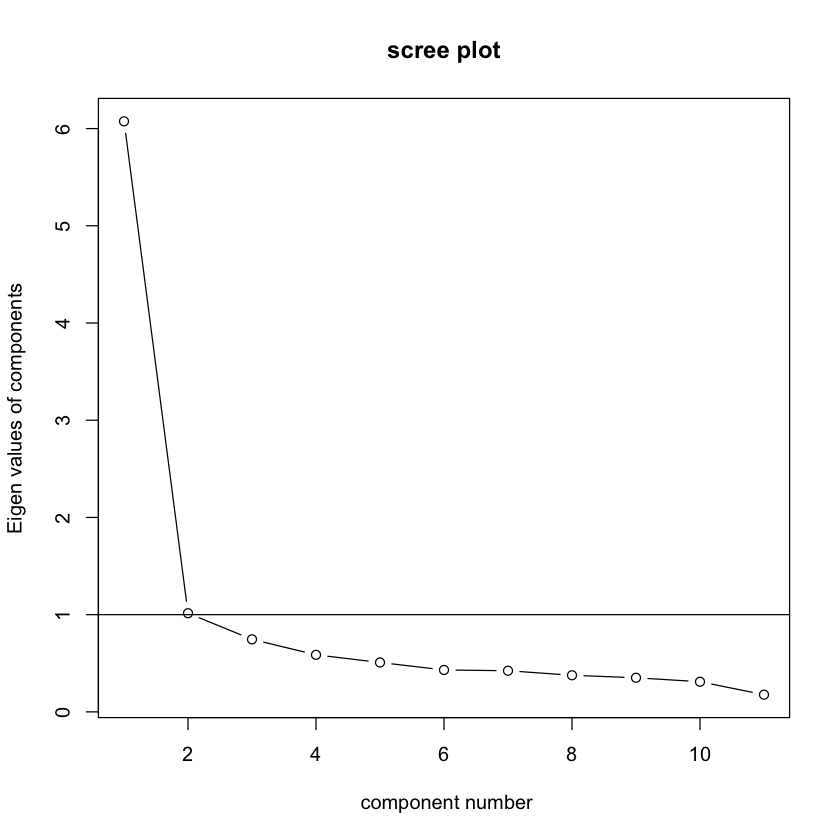

In [6]:
VSS.scree(wais_cor)

Lo scree test suggerisce una soluzione a $m=1$ fattori, come indicato
nella figura precedente. 

Il terzo metodo, nella versione della Parallel Analysis, può essere eseguito usando la funzione `paran()` contenuta nel pacchetto `paran`. La Parallel Analysis indica una soluzione a $m=1$
fattore.


Using eigendecomposition of correlation matrix.
Computing: 10%  20%  30%  40%  50%  60%  70%  80%  90%  100%


Results of Horn's Parallel Analysis for component retention
330 iterations, using the mean estimate

-------------------------------------------------- 
Component   Adjusted    Unadjusted    Estimated 
            Eigenvalue  Eigenvalue    Bias 
-------------------------------------------------- 
1           1.647667    3.765744      2.118077
-------------------------------------------------- 

Adjusted eigenvalues > 1 indicate dimensions to retain.
(1 components retained)



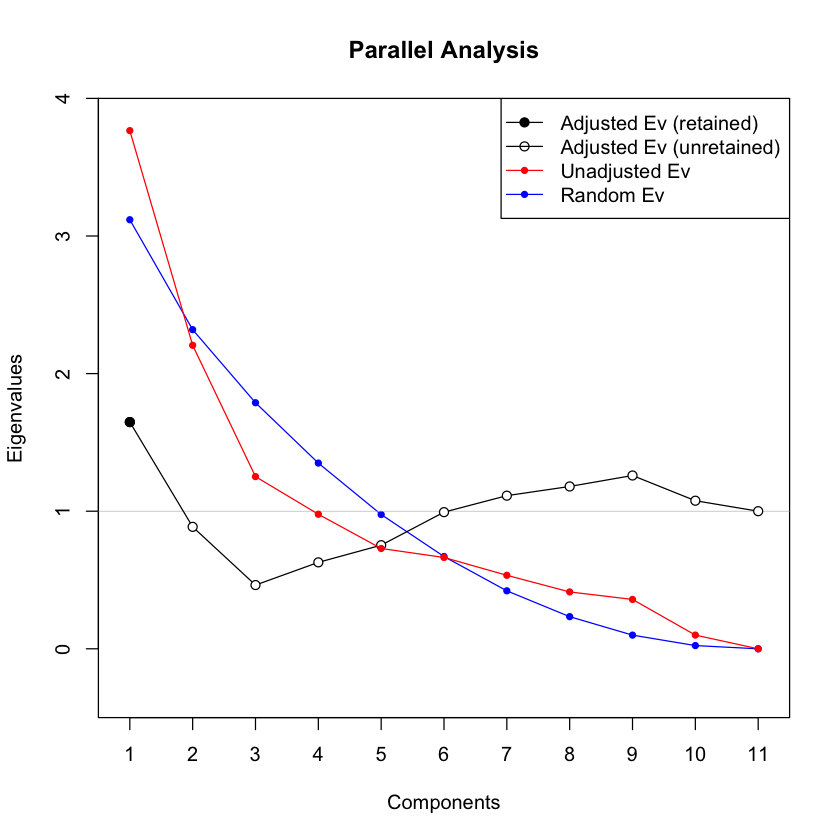

In [7]:
paran(wais_cor, graph = TRUE)

Il quarto metodo consiste nell'applicazione di un test inferenziale
relativo al numero di fattori. Questo metodo indica una soluzione
a sei fattori:

In [8]:
factanal(covmat=wais_cor, factors=4, n.obs=933)
factanal(covmat=wais_cor, factors=5, n.obs=933)


Call:
factanal(factors = 4, covmat = wais_cor, n.obs = 933)

Uniquenesses:
   IN    CO    AR    SI    DS    VO    SY    PC    BD    PA    OA 
0.229 0.387 0.005 0.416 0.645 0.137 0.005 0.375 0.331 0.492 0.519 

Loadings:
   Factor1 Factor2 Factor3 Factor4
IN 0.758   0.306   0.279   0.157  
CO 0.672   0.312   0.229   0.107  
AR 0.368   0.247   0.886   0.120  
SI 0.602   0.376   0.193   0.207  
DS 0.315   0.288   0.331   0.252  
VO 0.851   0.242   0.208   0.192  
SY 0.238   0.359   0.144   0.888  
PC 0.432   0.623   0.143   0.172  
BD 0.237   0.733   0.217   0.168  
PA 0.367   0.539   0.150   0.245  
OA 0.207   0.620   0.133   0.190  

               Factor1 Factor2 Factor3 Factor4
SS loadings      2.826   2.264   1.233   1.137
Proportion Var   0.257   0.206   0.112   0.103
Cumulative Var   0.257   0.463   0.575   0.678

Test of the hypothesis that 4 factors are sufficient.
The chi square statistic is 35.4 on 17 degrees of freedom.
The p-value is 0.00551 


Call:
factanal(factors = 5, covmat = wais_cor, n.obs = 933)

Uniquenesses:
   IN    CO    AR    SI    DS    VO    SY    PC    BD    PA    OA 
0.235 0.389 0.117 0.419 0.600 0.109 0.277 0.308 0.334 0.472 0.456 

Loadings:
   Factor1 Factor2 Factor3 Factor4 Factor5
IN  0.745   0.264   0.301   0.192   0.118 
CO  0.667   0.278   0.244   0.129   0.111 
AR  0.378   0.236   0.814   0.145         
SI  0.591   0.332   0.207   0.252   0.121 
DS  0.288   0.208   0.366   0.341   0.155 
VO  0.865   0.216   0.207   0.229         
SY  0.251   0.364   0.153   0.708         
PC  0.425   0.548   0.156   0.216   0.375 
BD  0.246   0.708   0.230   0.201   0.107 
PA  0.355   0.457   0.163   0.325   0.245 
OA  0.211   0.664   0.128   0.205         

               Factor1 Factor2 Factor3 Factor4 Factor5
SS loadings      2.799   1.986   1.176   1.043   0.280
Proportion Var   0.254   0.181   0.107   0.095   0.025
Cumulative Var   0.254   0.435   0.542   0.637   0.662

Test of the hypothesis that 5 factors are

Considero qui un esempio del metodo basato sulla minimizzazione dell'errore di previsione. Non è possibile applicare tale metodo ai dati dell'esempio in quanto è necessario disporre dei dati grezzi )(la matrice di correlazioni non è sufficiente). Useremo dunque un set di dati diverso (`holzinger19`), allo scopo di illustrare la procedura.

In [9]:
data(holzinger19)

suppressWarnings(
    fspe_out <- fspe(
        data = holzinger19,
        maxK = 10,
        nfold = 10,
        rep = 10,
        method = "PE"
    )
)

  |                                                                      |   0%

Loading required namespace: GPArotation



  |-------                                                               |  10%

  |--------------                                                        |  20%

  |---------------------                                                 |  30%

  |----------------------------                                          |  40%

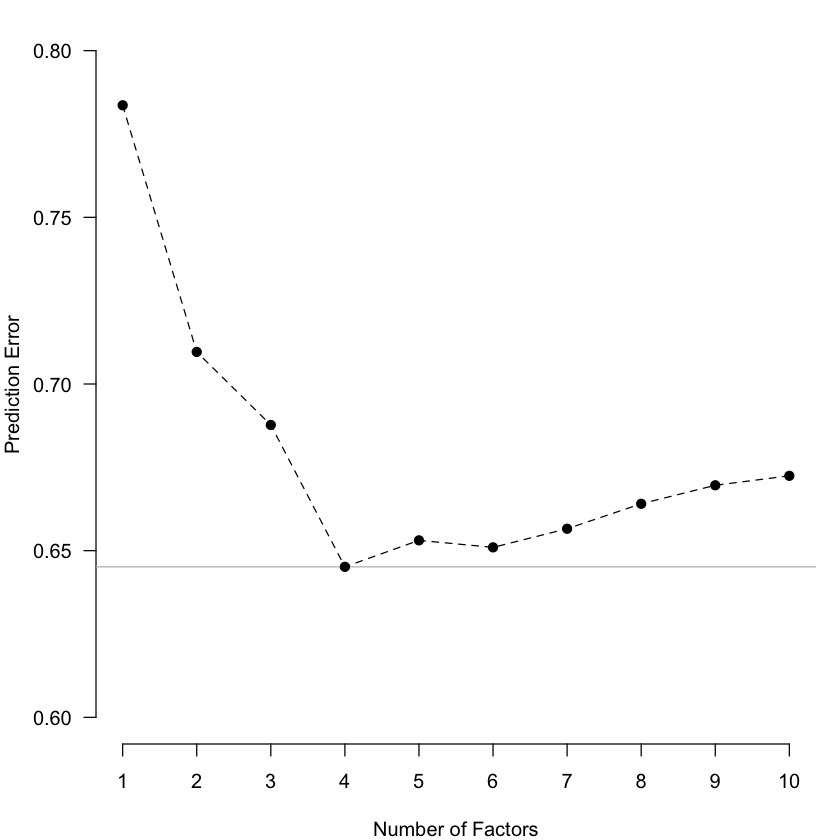

In [14]:
par(mar=c(4,4,1,1))
plot.new()
plot.window(xlim=c(1, 10), ylim=c(.6, .8))
axis(1, 1:10)
axis(2, las=2)
abline(h=min(fspe_out$PEs), col="grey")
lines(fspe_out$PEs, lty=2)
points(fspe_out$PEs, pch=20, cex=1.5)
title(xlab="Number of Factors", ylab="Prediction Error")

Per i dati `holzinger19`, il metodo di {cite:t}`haslbeck2022estimating` produce dunque una soluzione a 4 fattori.

## Considerazioni conclusive

In conclusione, si noti che, per alcuni campioni di dati, la scelta del numero di fattori $m$ non è ovvia e questa indeterminazione costituisce un limite dell’analisi fattoriale. Solitamente, si utilizza un metodo per la scelta di $m$, come lo scree test, e si valuta la proporzione di varianza spiegata di ciascun item e l’interpretabilità della soluzione ottenuta dopo una rotazione appropriata. Se le comunalità o l’interpretabilità dei fattori non sembrano adeguati, si può procedere con un numero maggiore di fattori. Tuttavia, questa procedura è soggettiva e i limiti della soluzione ottenuta sono evidenti. In altri campioni di dati, la scelta di $m$ può essere più certa quando tutti i metodi forniscono la stessa risposta.